<a href="https://colab.research.google.com/github/mohammadreza-mohammadi94/DataAnalysis-And-MachineLearning/blob/master/7.%20Sentiment%20Analysis/Email%20Spam%20Classification%20Naive%20Bayes%20%26%20SMOTE/Spam_Email_Classification_Naive_Bayes_%26_SMOTE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Import Libraries

In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore')

# Download Dataset

In [132]:
!kaggle datasets download -d ashfakyeafi/spam-email-classification

Dataset URL: https://www.kaggle.com/datasets/ashfakyeafi/spam-email-classification
License(s): apache-2.0
spam-email-classification.zip: Skipping, found more recently modified local copy (use --force to force download)


In [133]:
!unzip /content/spam-email-classification.zip

Archive:  /content/spam-email-classification.zip
replace email.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

## Import Dataset

In [134]:
df = pd.read_csv("/content/email.csv")
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


# Convert Categories to Binary Format

In [135]:
# Define new feature to show binary way of Message status
# To show that whether that particular email is spam or not.
df['Is_Spam'] = df['Category'].apply(lambda x: 1 if x=='spam' else 0)
df.head()

,Category,Message,Is_Spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


# Split Dependent and Independent Variables and Train/Test Sets

In [152]:
X = df['Message'] # Features
y = df['Is_Spam'] # Target

# Splitting Train & Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Naive Bayes Model

In [159]:
# Create pipeline for Naive Bayes
nv_pipeline = Pipeline(
    [
        ('vectorizer', TfidfVectorizer()),
        ('nb', MultinomialNB())
    ]
)

# Train naive bayes model
nv_pipeline.fit(X_train, y_train)

# Predict on test set
y_pred_nv = nv_pipeline.predict(X_test)

# Probability
y_pred_proba_nv = nv_pipeline.predict_proba(X_test)[:,1]

## Confusion Matrix

Text(50.722222222222214, 0.5, 'Actual')

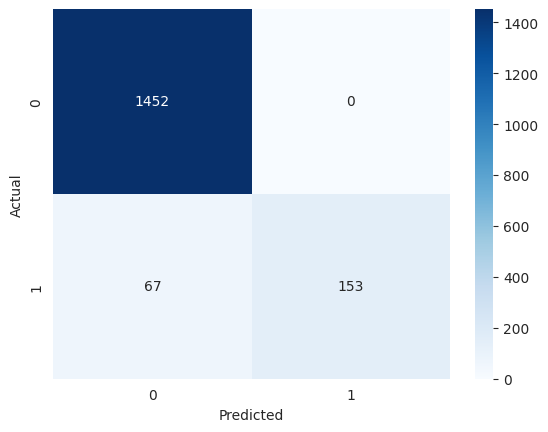

In [160]:
# Check confusion matrix
cnf_matrix_nv = confusion_matrix(y_test, y_pred_nv)

sns.heatmap(cnf_matrix_nv, cmap='Blues', annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [161]:
# Check classification report
print(classification_report(y_test, y_pred_nv))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1452
           1       1.00      0.70      0.82       220

    accuracy                           0.96      1672
   macro avg       0.98      0.85      0.90      1672
weighted avg       0.96      0.96      0.96      1672



## ROC Curve

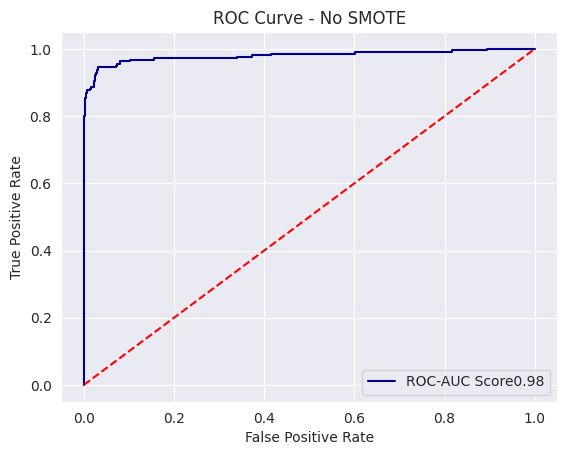

In [162]:
# Calculate ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_pred_proba_nv)

# Calculate FPR, TPR
fpr, tpr, threshold = roc_curve(y_test, y_pred_proba_nv)

# Plot ROC Curve
sns.set_style('darkgrid')
plt.plot(fpr, tpr, color='darkblue', label=f"ROC-AUC Score{roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - No SMOTE')
plt.legend()
plt.show()

# Train Naive Bayes Model With SMOTE Algorithm

In [163]:
# Convert text to TF-IDF features
tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(X)

# Split Train/Test sets based on X_tfidf
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.3, random_state=42)

# Perfome SMOTE to have more balanced data
smt = SMOTE(random_state=42,sampling_strategy=0.5)
X_train_sm, y_train_sm = smt.fit_resample(X_train, y_train)

# Check shapes
print(X_train_sm.shape)
print(y_train_sm.shape)

(5061, 8711)
(5061,)


In [165]:
# Define MultinomialNB model
nb = MultinomialNB()
# Fitting Model
nb.fit(X_train_sm, y_train_sm)
# Predictions
y_pred_sm = nb.predict(X_test)

# Probability
y_pred_proba_sm = nb.predict_proba(X_test)[:,1]

## Confusion Matrix

Text(50.722222222222214, 0.5, 'Actual')

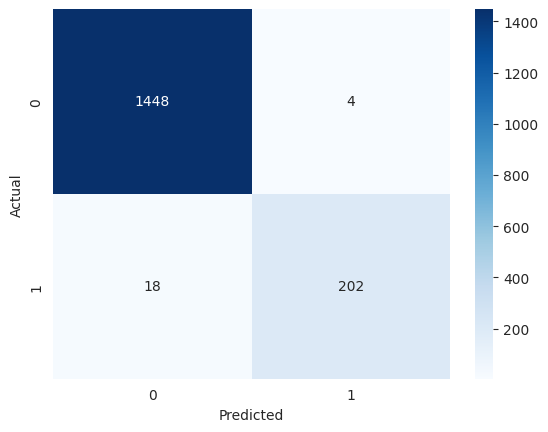

In [166]:
# Check Confusion Matrix
cnf_nb_sm = confusion_matrix(y_test, y_pred_sm)

sns.heatmap(cnf_nb_sm, cmap='Blues', annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [167]:
# Check classification report
print(classification_report(y_test, y_pred_sm))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1452
           1       0.98      0.92      0.95       220

    accuracy                           0.99      1672
   macro avg       0.98      0.96      0.97      1672
weighted avg       0.99      0.99      0.99      1672



## ROC Curve

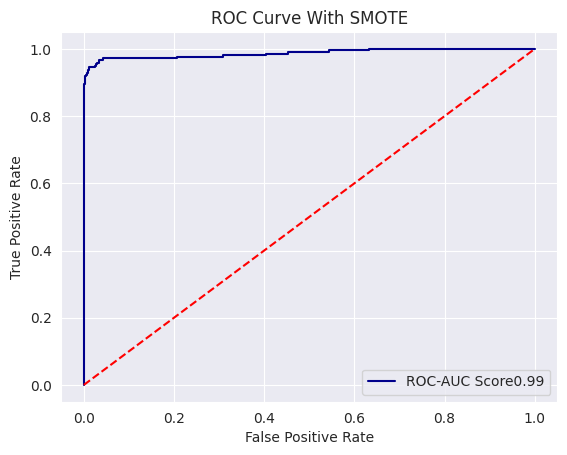

In [168]:
# Calculate ROC-AUC Score
roc_auc =  roc_auc_score(y_test, y_pred_proba_sm)

# Calculate FPR, TRP
fpr, tpr, threshold = roc_curve(y_test, y_pred_proba_sm)

# Plot ROC Curve
sns.set_style('darkgrid')
plt.plot(fpr, tpr, color='darkblue', label=f"ROC-AUC Score{roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve With SMOTE')
plt.legend()
plt.show()

## Cross Validation

In [169]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(nb, X_train_sm, y_train_sm, cv=5, scoring='roc_auc')
print(scores)
print(scores.mean())

[0.99692308 0.99577976 0.99978459 0.99933619 0.99906941]
0.9981786047104467
